In [38]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import rasterio

In [39]:
def read_method(method:str=''):
    if method == 'Image' or method == '':
        return Image.open
    if method == 'rasterio':
        return rasterio.open
    if method == 'numpy':
        return np.load


def image_normalize(im, axis = (0,1), c = 1e-8):
    return (im - im.mean(axis)) / (im.std(axis) + c)

(256, 256)


/home/lenovo/miniconda3/envs/tf-nov/lib/python3.7/site-packages/rasterio/__init__.py:220: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix be returned.
  s = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


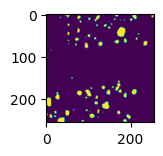

In [40]:
# rootdir="/home/lenovo/treeseg-dataset/full_process/sample_108"
# rootdir="/home/lenovo/treeseg-dataset/inference/all-views/inference_sample_128"
rootdir="/home/lenovo/treeseg-dataset/inference/all-views/inference_result_128"

a=68
r=102
c=74
v=0
# schema_name_match = f"{rootdir}/r{r}c{c}-match{v}.png"
# schema_name_match = f"{rootdir}/match-0-area{a}-r{r}c{c}.png"
schema_name_match = f"{rootdir}/r{r}c{c}-match{v}.png"

im = read_method('rasterio')(schema_name_match.replace('match','segmap')).read(1)
arr = np.array(im)
# im2 = read_method('rasterio')(schema_name_match.replace('match','ndvi')).read(1)
# arr2 = np.array(im2)

# im3 = read_method('rasterio')(schema_name_match.replace('match','annotation')).read(1)
# arr3 = np.array(im3)
# im4 = read_method('rasterio')(schema_name_match.replace('match','boundary')).read(1)
# arr4 = np.array(im4)

print(arr.shape)
fig = plt.figure()

fig.add_subplot(1,4,1)
plt.imshow(arr)

# fig.add_subplot(1,4,2)
# plt.imshow(arr2)

# fig.add_subplot(1,4,3)
# plt.imshow(arr3)
# fig.add_subplot(1,4,4)
# plt.imshow(arr4)
plt.show()

min-max of pan: -1.9548816680908203,3.567915439605713
(128, 128)


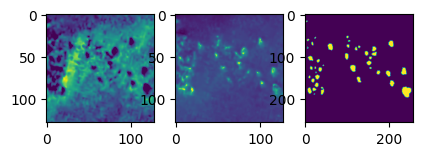

In [41]:
# rootdir="/home/lenovo/treeseg-dataset/full_process/sample_108"
sample_rootdir="/home/lenovo/treeseg-dataset/inference/all-views/inference_sample_128"
result_rootdir="/home/lenovo/treeseg-dataset/inference/all-views/inference_result_128"

a=68
r=112
c=78
v=0
sample_schema_name_match = f"{sample_rootdir}/r{r}c{c}-match{v}.png"
# schema_name_match = f"{rootdir}/match-0-area{a}-r{r}c{c}.png"
result_schema_name_match = f"{result_rootdir}/r{r}c{c}-match{v}.png"

im = read_method('Image')(sample_schema_name_match.replace('match','pan'))
arr = np.array(im)
print(f"min-max of pan: {np.min(arr)},{np.max(arr)}")
im2 = read_method('Image')(sample_schema_name_match.replace('match','ndvi'))
arr2 = np.array(im2)

im3 = read_method('Image')(result_schema_name_match.replace('match','segmap'))
arr3 = np.array(im3)

# im4 = read_method('Image')(schema_name_match.replace('match','boundary'))
# arr4 = np.array(im4)

print(arr.shape)
fig = plt.figure()

fig.add_subplot(1,4,1)
plt.imshow(arr)

fig.add_subplot(1,4,2)
plt.imshow(arr2)

fig.add_subplot(1,4,3)
plt.imshow(arr3)
# fig.add_subplot(1,4,4)
# plt.imshow(arr4)
plt.show()

min-max: -14.743227005004883, 21.20875358581543
(3008, 4992)


ValueError: 1 is not a valid value for name; supported values are 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'winter', 'winter_r'

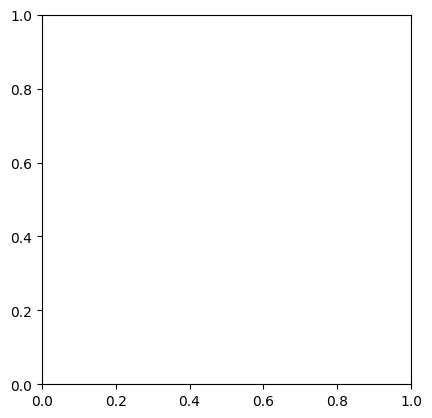

In [48]:
root_dir = "/home/lenovo/treeseg-dataset/inference/all-views/merge_result_128"
# img = read_method("rasterio")(f"{root_dir}/merge_result_partial0-3-pan.png").read(1)
img = read_method("Image")(f"{root_dir}/merge_result_partial5-4-pan.png")
img = np.asarray(img)

# img = img[0:500,0:500]
# img_arr = image_normalize(img)
img_arr = img
print(f"min-max: {np.min(img_arr)}, {np.max(img_arr)}")
print(img.shape)
plt.imshow(img_arr, cmap=1)
print(np.mean(img_arr))
print(np.unique(img_arr))
plt.show()